In [11]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# Files to load
mouse_drug_data = "Resources/mouse_drug_data.csv"
clinicaltrial_data = "Resources/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinicaltrial Data

mouse_drug_df = pd.read_csv(mouse_drug_data)
clinicaltrial_df = pd.read_csv(clinicaltrial_data)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_drug_df, clinicaltrial_df, on="Mouse ID", how="inner")

# Display the data table for preview
combined_df.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


In [24]:
# Tumor Response to Treatment
# Store the mean Tumor Volume Data Grouped by Drug and Timepoint
tumor_volume_mean = combined_df.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"].mean()

# Convert to DataFrame
tumor_volume_mean_df = pd.DataFrame(tumor_volume_mean)
# Preview DataFrame
tumor_volume_mean_df

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325
...                                 ...
Zoniferol 25                  55.432935
          30                  57.713531
          35                  60.089372
          40                  62.916692
          45                  65.960888

[100 rows x 1 columns]

In [17]:
# Store the Standard Error of Tumor Volume Grouped by Drug and Timepoint
tumor_volume_std_error = combined_df.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"].sem()
# Convert to DataFrame

tumor_volume_std_error_df = pd.DataFrame(tumor_volume_std_error)

# Preview DataFrame
tumor_volume_std_error_df

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731
...                                 ...
Zoniferol 25                   0.602513
          30                   0.800043
          35                   0.881426
          40                   0.998515
          45                   1.003576

[100 rows x 1 columns]

In [18]:
# Minor Data Munging to Re-Format the DataFrame

minor_data_munging = pd.pivot_table(combined_df, index=["Timepoint"], columns=["Drug"])["Tumor Volume (mm3)"]

# Preview the Reformatted work

minor_data_munging

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


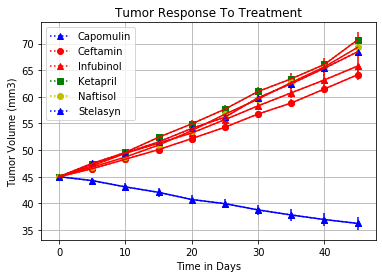

In [79]:
# Generate the plot(with Error Bars)
# calculate means and std errors on means

capomulin = minor_data_munging[["Capomulin"]]
capomulin_to_list = capomulin['Capomulin'].tolist()
capomulin_sem = tumor_volume_std_error[["Capomulin"]]
capomulin_to_list_sem = capomulin_sem ['Capomulin'].tolist()

ceftamin = minor_data_munging[["Ceftamin"]]
ceftamin_to_list = ceftamin['Ceftamin'].tolist()
ceftamin_sem = tumor_volume_std_error[["Ceftamin"]]
ceftamin_to_list_sem = ceftamin_sem ['Ceftamin'].tolist()

infubinol = minor_data_munging[["Infubinol"]]
infubinol_to_list = infubinol['Infubinol'].tolist()
infubinol_sem = tumor_volume_std_error[["Infubinol"]]
infubinol_to_list_sem = infubinol_sem ['Infubinol'].tolist()

ketapril = minor_data_munging[["Ketapril"]]
ketapril_to_list = ketapril['Ketapril'].tolist()
ketapril_sem = tumor_volume_std_error[["Ketapril"]]
ketapril_to_list_sem = ketapril_sem ['Ketapril'].tolist()

naftisol = minor_data_munging[["Naftisol"]]
naftisol_to_list = naftisol['Naftisol'].tolist()
naftisol_sem = tumor_volume_std_error[["Naftisol"]]
naftisol_to_list_sem = naftisol_sem ["Naftisol"].tolist()

stelasyn = minor_data_munging[["Stelasyn"]]
stelasyn_to_list = stelasyn["Stelasyn"].tolist()
stelasyn_sem = tumor_volume_std_error[["Stelasyn"]]
stelasyn_to_list_sem = stelasyn_sem ["Stelasyn"].tolist()

# plot means with error bars

x_limit = 50
x_axis = np.arange(0, x_limit, 5)

plt.scatter(x_axis, capomulin_to_list, marker="^", color="blue")
plt.plot(x_axis, capomulin_to_list, "b:^", label='Capomulin')
plt.errorbar(x_axis, capomulin_to_list, yerr=capomulin_to_list_sem, color="blue")

plt.scatter(x_axis, ceftamin_to_list, marker='o', color='red')
plt.plot(x_axis, ceftamin_to_list, 'r:o', label='Ceftamin')
plt.errorbar(x_axis, ceftamin_to_list, yerr=ceftamin_to_list_sem, color='red')

plt.scatter(x_axis, infubinol_to_list, marker='^', color='red')
plt.plot(x_axis, infubinol_to_list, 'r:^', label='Infubinol')
plt.errorbar(x_axis, infubinol_to_list, yerr=infubinol_to_list_sem, color='red')

plt.scatter(x_axis, ketapril_to_list, marker='s', color='green')
plt.plot(x_axis,ketapril_to_list, 'g:s', label='Ketapril')
plt.errorbar(x_axis, ketapril_to_list, yerr=ketapril_to_list_sem, color='red')

plt.scatter(x_axis, naftisol_to_list, marker='o', color='yellow')
plt.plot(x_axis, naftisol_to_list, 'y:o', label='Naftisol')
plt.errorbar(x_axis, naftisol_to_list, yerr=naftisol_to_list_sem, color='red')

plt.scatter(x_axis, stelasyn_to_list, marker='^', color='blue')
plt.plot(x_axis, stelasyn_to_list, 'b:^', label='Stelasyn')
plt.errorbar(x_axis, stelasyn_to_list, yerr=stelasyn_to_list_sem, color='red')

plt.title("Tumor Response To Treatment")
plt.xlabel('Time in Days')
plt.ylabel('Tumor Volume (mm3)')
plt.legend()
plt.grid()

# Save the Figure
plt.savefig("Images/tumor-response-to-treatment.png")
# Show the Figure
plt.show()

In [69]:
# Metastatic Response to Treatment
# Store the Mean Met. Site Data Grouped by Drug and Timepoint

mean_met_site= combined_df.groupby(["Drug", "Timepoint"])["Metastatic Sites"].mean()
# Convert to DataFrame

mean_met_site_df = pd.DataFrame(mean_met_site)
# Preview DataFrame

mean_met_site_df

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174
...                               ...
Zoniferol 25                 1.687500
          30                 1.933333
          35                 2.285714
          40                 2.785714
          45                 3.071429

[100 rows x 1 columns]

In [70]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

met_site_std_error = combined_df.groupby(["Drug", "Timepoint"])["Metastatic Sites"].sem()

# Convert to DataFrame
met_site_std_error_df = pd.DataFrame(met_site_std_error)

# Preview DataFrame

met_site_std_error_df

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621
...                               ...
Zoniferol 25                 0.236621
          30                 0.248168
          35                 0.285714
          40                 0.299791
          45                 0.286400

[100 rows x 1 columns]

In [74]:
# Minor Data Munging to Re-Format the Data Frames
met_site_data_munging = pd.pivot_table(combined_df, index=["Timepoint"], columns=["Drug"])["Tumor Volume (mm3)"]

# Preview that Reformatting worked

met_site_data_munging

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


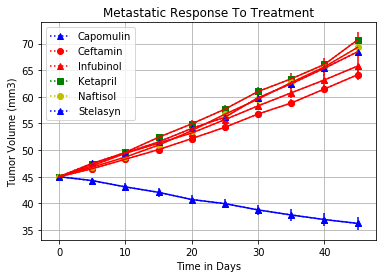

In [78]:
# Generate the plot with error bars
capomulin_metastatic = met_site_data_munging[["Capomulin"]]
capomulin_metastatic_list = capomulin_metastatic['Capomulin'].tolist()
capomulin_metastatic_sem = tumor_volume_std_error[["Capomulin"]]
capomulin_metastatic_list_sem = capomulin_metastatic_sem ['Capomulin'].tolist()

ceftamin_metastatic = met_site_data_munging[["Ceftamin"]]
ceftamin_metastatic_list = ceftamin_metastatic['Ceftamin'].tolist()
ceftamin_metastatic_sem = tumor_volume_std_error[["Ceftamin"]]
ceftamin_metastatic_list_sem = ceftamin_metastatic_sem ['Ceftamin'].tolist()

infubinol_metastatic = met_site_data_munging[["Infubinol"]]
infubinol_metastatic_list = infubinol_metastatic['Infubinol'].tolist()
infubinol_metastatic_sem = tumor_volume_std_error[["Infubinol"]]
infubinol_metastatic_list_sem = infubinol_metastatic_sem ['Infubinol'].tolist()

ketapril_metastatic = met_site_data_munging[["Ketapril"]]
ketapril_metastatic_list = ketapril_metastatic['Ketapril'].tolist()
ketapril_metastatic_sem = tumor_volume_std_error[["Ketapril"]]
ketapril_metastatic_list_sem = ketapril_metastatic_sem ['Ketapril'].tolist()

naftisol_metastatic = met_site_data_munging[["Naftisol"]]
naftisol_metastatic_list = naftisol_metastatic['Naftisol'].tolist()
naftisol_metastatic_sem = tumor_volume_std_error[["Naftisol"]]
naftisol_metastatic_list_sem = naftisol_metastatic_sem ["Naftisol"].tolist()

stelasyn_metastatic= met_site_data_munging[["Stelasyn"]]
stelasyn_metastatic_list = stelasyn_metastatic["Stelasyn"].tolist()
stelasyn_metastatic_sem = tumor_volume_std_error[["Stelasyn"]]
stelasyn_metastatic_list_sem = stelasyn_metastatic_sem ["Stelasyn"].tolist()

# plot the data in a scatter plot

x_limit = 50
x_axis = np.arange(0, x_limit, 5)

plt.scatter(x_axis, capomulin_metastatic_list, marker="^", color="blue")
plt.plot(x_axis, capomulin_metastatic_list, "b:^", label='Capomulin')
plt.errorbar(x_axis, capomulin_metastatic_list, yerr=capomulin_metastatic_list_sem, color="blue")

plt.scatter(x_axis, ceftamin_metastatic_list, marker='o', color='red')
plt.plot(x_axis, ceftamin_metastatic_list, 'r:o', label='Ceftamin')
plt.errorbar(x_axis, ceftamin_metastatic_list, yerr=ceftamin_metastatic_list_sem, color='red')

plt.scatter(x_axis, infubinol_metastatic_list, marker='o', color='red')
plt.plot(x_axis, infubinol_metastatic_list, 'r:o', label='Infubinol')
plt.errorbar(x_axis, infubinol_metastatic_list, yerr=infubinol_metastatic_list_sem, color='red')

plt.scatter(x_axis, ketapril_metastatic_list, marker='s', color='green')
plt.plot(x_axis,ketapril_metastatic_list, 'g:s', label='Ketapril')
plt.errorbar(x_axis, ketapril_metastatic_list, yerr=ketapril_metastatic_list_sem, color='red')

plt.scatter(x_axis, naftisol_metastatic_list, marker='o', color='yellow')
plt.plot(x_axis, naftisol_metastatic_list, 'y:o', label='Naftisol')
plt.errorbar(x_axis, naftisol_metastatic_list, yerr=naftisol_metastatic_list_sem, color='red')

plt.scatter(x_axis, stelasyn_metastatic_list, marker='^', color='blue')
plt.plot(x_axis, stelasyn_metastatic_list, 'b:^', label='Stelasyn')
plt.errorbar(x_axis, stelasyn_metastatic_list, yerr=stelasyn_metastatic_list_sem, color='red')

plt.title("Metastatic Response To Treatment")
plt.xlabel('Time in Days')
plt.ylabel('Tumor Volume (mm3)')
plt.legend()
plt.grid()

# Save the Figure
plt.savefig("Images/metastatic_response-to-treatment.png")
# Show the Figure
plt.show()

In [81]:
# Survival Rates
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

mice_count = combined_df.groupby(["Drug", "Timepoint"])["Mouse ID"].count()

# Convert to DataFrame
mice_count_df = pd.DataFrame(mice_count)

# Preview DataFrame

mice_count_df

Mouse ID
Drug      Timepoint          
Capomulin 0                25
          5                25
          10               25
          15               24
          20               23
...                       ...
Zoniferol 25               16
          30               15
          35               14
          40               14
          45               14

[100 rows x 1 columns]

In [90]:
# Minor Data Munging to Re-Format the Data Frames

mice_count_data_munging = pd.pivot_table(mice_count_df, index=["Timepoint"], columns=["Drug"])["Mouse ID"]

# Preview the Data Frame
mice_count_data_munging

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


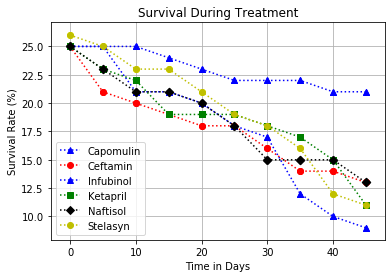

In [94]:
# Generate the Plot (Accounting for percentages)


capomulin_mice_count = mice_count_data_munging[["Capomulin"]]
capomulin_mice_count_list = capomulin_mice_count['Capomulin'].tolist()

ceftamin_mice_count = mice_count_data_munging[["Ceftamin"]]
ceftamin_mice_count_list = ceftamin_mice_count['Ceftamin'].tolist()

infubinol_mice_count = mice_count_data_munging[["Infubinol"]]
infubinol_mice_count_list = infubinol_mice_count['Infubinol'].tolist()

ketapril_mice_count = mice_count_data_munging[["Ketapril"]]
ketapril_mice_count_list = ketapril_mice_count['Ketapril'].tolist()

naftisol_mice_count = mice_count_data_munging[["Naftisol"]]
naftisol_mice_count_list = naftisol_mice_count['Naftisol'].tolist()

stelasyn_mice_count = mice_count_data_munging[["Stelasyn"]]
stelasyn_mice_count_list = stelasyn_mice_count['Stelasyn'].tolist()

x_limit = 50
x_axis = np.arange(0, x_limit, 5)

plt.scatter(x_axis, capomulin_mice_count_list, marker='^', color='blue')
plt.plot(x_axis, capomulin_mice_count_list, 'b:^', label='Capomulin')

plt.scatter(x_axis, ceftamin_mice_count_list, marker='o', color='red')
plt.plot(x_axis, ceftamin_mice_count_list, 'r:o', label='Ceftamin')

plt.scatter(x_axis, infubinol_mice_count_list, marker='^', color='blue')
plt.plot(x_axis, infubinol_mice_count_list, 'b:^', label='Infubinol')

plt.scatter(x_axis, ketapril_mice_count_list, marker='s', color='green')
plt.plot(x_axis, ketapril_mice_count_list, 'g:s', label='Ketapril')

plt.scatter(x_axis, naftisol_mice_count_list, marker='D', color='black')
plt.plot(x_axis, naftisol_mice_count_list, 'k:D', label='Naftisol')

plt.scatter(x_axis, stelasyn_mice_count_list, marker='o', color='yellow')
plt.plot(x_axis, stelasyn_mice_count_list, 'y:o', label='Stelasyn')

plt.title("Survival During Treatment")
plt.xlabel('Time in Days')
plt.ylabel('Survival Rate (%)')
plt.grid()
plt.legend()

# Save the Figure
plt.savefig('Images/survival-during-treatment.png')

# Show the Figure
plt.show()

